In [1]:

'''

Airbnb Listings & Reviews
Airbnb data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

NOTE: Prices are in local currency

'''

import numpy as np
import pandas as pd
from datetime import datetime


In [2]:
    
df_listings_dictionary = pd.read_csv('Listings_data_dictionary.csv', encoding='utf-8')  
df_listings_dictionary


,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


In [3]:
# Import/Open the Listings.csv file

# Errors while reading the file:
#    UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 206899: invalid start byte
#    DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.

#
# Load the datafile using the names, usecols and dtype option
#
#    names: Series with all column names in the datafile.
#
#    usecols: Series with all colum names to be used in the dataframe
#
#    dtype: give the datatype for each column: use object or int64 (and cleanup data later)
#


# 2 ways to get the header/column names.
#    - dictionary
#    - read first line only

listings_names=df_listings_dictionary['Field']

# df_header = pd.read_csv('Listings.csv',
#                         sep=',',
#                         encoding='utf-8',
#                         nrows=0,
#                         skiprows=0,   
#                         encoding_errors='replace',
#                         quotechar='"')
# listings_names = df_header.columns


# 
# usecols: read all columns except 'amenities'.
#

listings_usecols=df_listings_dictionary[['Field']]   # Dataframe
#listings_usecols = listings_usecols.drop(listings_usecols[listings_usecols['Field']== 'name'].index)
listings_usecols = listings_usecols.drop(listings_usecols[listings_usecols['Field']== 'amenities'].index)
listings_usecols = listings_usecols.to_dict()['Field']


#
# dtypes: all objects, except 4 columns
#

#listings_dtypes=df_listings_dictionary['Field']      # Series
listings_dtypes=df_listings_dictionary[['Field']]     # Dataframe
listings_dtypes['dtype']='object'                     # Add default datatype
listings_dtypes.set_index('Field', inplace=True)      # 
listings_dtypes.loc['listing_id','dtype'] = 'int64'   # change datatype for column before import
listings_dtypes.loc['host_id','dtype'] = 'int64'      # 
listings_dtypes.loc['accommodates','dtype'] = 'int64' # 
listings_dtypes.loc['price','dtype'] = 'int64'        # 
listings_dtypes=listings_dtypes.to_dict()['dtype']    # extract dtypes into dictionary



df_listings = pd.read_csv('Listings.csv',
                          sep=',',
                          encoding='utf-8',
                          names=listings_names,
                          skiprows=1,
                          header=0,   
                          encoding_errors='replace',
#                         quotechar='"',
                          usecols = listings_usecols,
                          dtype=listings_dtypes)
df_listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279711 entries, 0 to 279710
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   listing_id                   279711 non-null  int64 
 1   name                         279536 non-null  object
 2   host_id                      279711 non-null  int64 
 3   host_since                   279546 non-null  object
 4   host_location                278871 non-null  object
 5   host_response_time           150930 non-null  object
 6   host_response_rate           150930 non-null  object
 7   host_acceptance_rate         166625 non-null  object
 8   host_is_superhost            279546 non-null  object
 9   host_total_listings_count    279546 non-null  object
 10  host_has_profile_pic         279546 non-null  object
 11  host_identity_verified       279546 non-null  object
 12  neighbourhood                279711 non-null  object
 13  district      

In [4]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 206899: invalid start byte
#
# 31203011,Ã£â€šË†Ã£Â â€ Ã£Ââ€œÃ£ÂÂ-GrÃƒÂ¼ezi-Bienvenue-Welcome Paris Le Marais,36974531,2015-06-28,"Paris, Ile-de-France, France"

df_listings[df_listings['listing_id']==31203011]

# there is an encoding problem in this dataset.

#
# Original name: https://www.airbnb.nl/rooms/31203011
#
# ようこそ-Grüezi-Bienvenue-Welcome Paris Le Marais
#
# よ       う       こ       そ            -  G  r
# e3 82 88 e3 81 86 e3 81 93 e3 81 9d     2d 47 73 
#

# Exact the same file on Kaggle:
# https://www.kaggle.com/datasets/mysarahmadbhat/airbnb-listings-reviews?resource=download



,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
546,31203011,ã‚ˆã� †ã“ã-GrÃ¼ezi-Bienvenue-Welcome Paris ...,36974531,2015-06-28,"Paris, Ile-de-France, France",NaN,NaN,NaN,t,1,...,1,1125,98,10,10,10,10,10,10,f


In [5]:
#
# https://insideairbnb.com/get-the-data/
# has the correct data (only 95840 rows, different columns)

# 31203011,ようこそ-Grüezi-Bienvenue-Welcome Paris Le Marais,36974531,Mariëtta,,Temple,48.86185,2.35711,Entire home/apt,,1,25,2020-03-13,0.36,1,0,0,7510302832305

# https://data.insideairbnb.com/france/ile-de-france/paris/2024-09-06/visualisations/listings.csv

df_listings_insideairbnb = pd.read_csv('Listings_insideairbnb.csv',
                                        sep=',',
                                        encoding='utf-8')

df_listings_insideairbnb[df_listings_insideairbnb['id']==31203011]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
22912,31203011,ようこそ-Grüezi-Bienvenue-Welcome Paris Le Marais,36974531,Mariëtta,NaN,Temple,48.86185,2.35711,Entire home/apt,NaN,1,25,2020-03-13,0.36,1,0,0,7510302832305


In [6]:
 # Cast any date columns as a datetime format
    
df_listings['host_since'] = pd.to_datetime(df_listings['host_since'], format='%Y-%m-%d')

df_listings['host_since']

0        2013-11-29
1        2014-07-31
2        2013-12-17
3        2014-12-14
4        2011-04-13
            ...    
279706   2015-04-13
279707   2013-11-27
279708   2012-04-27
279709   2015-07-16
279710   2013-06-17
Name: host_since, Length: 279711, dtype: datetime64[ns]

In [7]:
# Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’
 
df_paris=df_listings[df_listings['city']=='Paris'][['host_since','neighbourhood', 'city', 'accommodates', 'price']]

# QA the Paris listings data: check for missing values

print (df_paris.isnull().values.sum())
# find empty (NaN, NaT)
# print (df_paris[df_paris.isna().any(axis=1)])

# drop empty (NaN, NaT) for column
df_paris.dropna(subset=["host_since"], inplace=True)

print (df_paris.query("price == 0 or accommodates==0").count())

# drop 0 values
df_paris.drop(df_paris[df_paris['price']==0].index, inplace=True)
df_paris.drop(df_paris[df_paris['accommodates']==0].index, inplace=True)

33
host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64


In [8]:
# QA the Paris listings data: calculate the minimum, maximum, and average for each numeric field

# df_paris.describe(include='all')
df_paris.describe(include=np.number)


,accommodates,price
count,64594.000000,64594.000000
mean,3.040499,113.214107
std,1.586698,214.555424
min,1.000000,8.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [9]:
#
# Part 2
#

# Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

paris_listings_neighbourhood = (df_paris.groupby('neighbourhood')
                                        .agg({'price': 'mean'})
                                        .sort_values(by=['price'], ascending=False))
paris_listings_neighbourhood

,price
neighbourhood,
Elysee,211.373651
Louvre,175.754448
Passy,161.290875
Palais-Bourbon,157.514464
Luxembourg,155.794589
Bourse,149.633577
Hotel-de-Ville,144.515228
Temple,138.429300
Pantheon,122.983599


In [10]:
paris_listings_neighbourhood.index[0]

'Elysee'

In [11]:
# Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

# added the number of hosts column

paris_listings_accomodations = (df_paris.query ("neighbourhood == 'Elysee'")
                                        .groupby('accommodates')
# dictionary, no rename columns?        .agg({'price':'mean','neighbourhood': 'count'})
                                        .agg(mean_price=('price','mean'), hosts_count=('price','count'))
                                        .sort_values(by=['mean_price'], ascending=True))
paris_listings_accomodations


,mean_price,hosts_count
accommodates,,
1,79.522222,90
3,153.882759,145
2,155.103352,716
4,212.096070,458
5,328.817073,82
6,355.508571,175
8,405.518519,27
7,411.538462,26
9,440.272727,11


In [12]:

# Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

# YEAR
# NEW HOSTS

# first total number of hosts per year:

paris_listings_over_time = (df_paris.set_index('host_since')
                                    .resample('YE')
                                    .agg(mean_price=('price','mean'),host_count=('price','count'))
                                  # .sort_values(by=['mean_price'], ascending=False)
                           )
paris_listings_over_time

# do not sort, index is used in graph.


,mean_price,host_count
host_since,,
2008-12-31,77.750000,4
2009-12-31,159.641509,106
2010-12-31,125.031250,416
2011-12-31,124.881913,1338
2012-12-31,111.578615,4592
2013-12-31,107.096414,8142
2014-12-31,100.253800,10922
2015-12-31,103.646250,12147
2016-12-31,114.211345,8867


In [13]:
# Pandas equivalent of Oracle Lead/Lag function
# paris_listings_over_time['lag_host'] = paris_listings_over_time['host_count'].shift(1)

# a table called paris_listings_over_time grouped by the ‘host_since’ year, 
# and calculate the average price 
# and count of rows representing the number of new hosts

paris_listings_over_time['host_diff'] = paris_listings_over_time['host_count'] -  paris_listings_over_time['host_count'].shift(1)

paris_listings_over_time


,mean_price,host_count,host_diff
host_since,,,
2008-12-31,77.750000,4,NaN
2009-12-31,159.641509,106,102.0
2010-12-31,125.031250,416,310.0
2011-12-31,124.881913,1338,922.0
2012-12-31,111.578615,4592,3254.0
2013-12-31,107.096414,8142,3550.0
2014-12-31,100.253800,10922,2780.0
2015-12-31,103.646250,12147,1225.0
2016-12-31,114.211345,8867,-3280.0


<Axes: title={'center': 'average price by neighborhood'}, xlabel='price in euro', ylabel='neighborhood'>

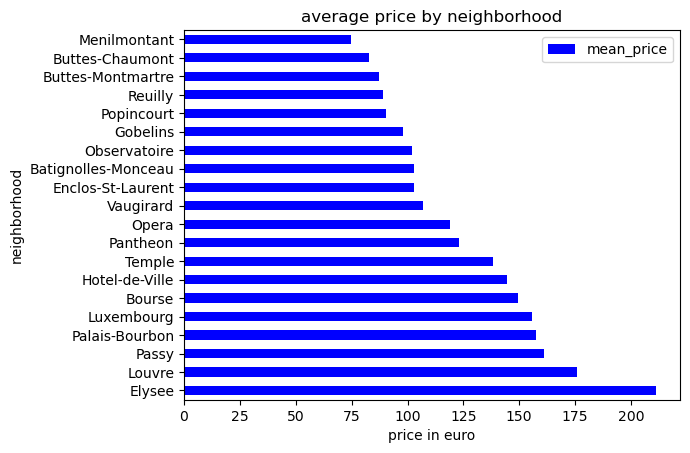

In [14]:

#Create a horizontal bar chart of the average price by neighborhood in Paris, 
# and make sure to add a title and change axis labels as needed

paris_listings_neighbourhood = (df_paris.groupby('neighbourhood')
                                        .agg(mean_price=('price','mean'), host_count= ('price','count'))
                                        .sort_values(by=['mean_price'], ascending=False))

paris_listings_neighbourhood.plot.barh(y = 'mean_price', 
                                       title = 'average price by neighborhood', 
                                       color = 'blue', 
                                       xlabel = 'price in euro', 
                                       ylabel ='neighborhood') 


<Axes: title={'center': 'average price by accommodates'}, xlabel='price in euro', ylabel='accommodates'>

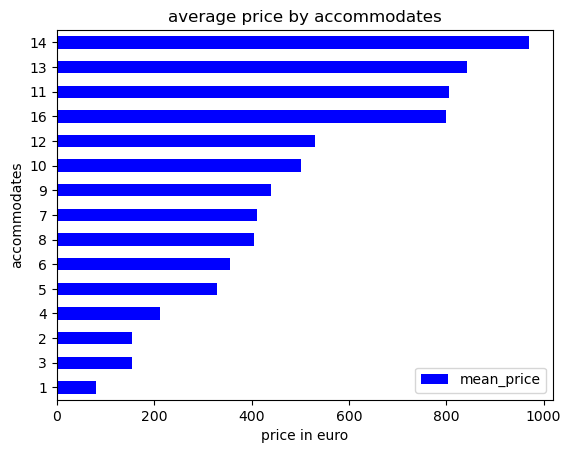

In [15]:
# Create a table named paris_listings_accomodations, 
# filter down to the most expensive neighborhood, 
# group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

paris_listings_accomodations.plot.barh(y = 'mean_price', 
                                       title = 'average price by accommodates', 
                                       color = 'blue', 
                                       xlabel = 'price in euro', 
                                       ylabel = 'accommodates') 


<Axes: xlabel='host_since'>

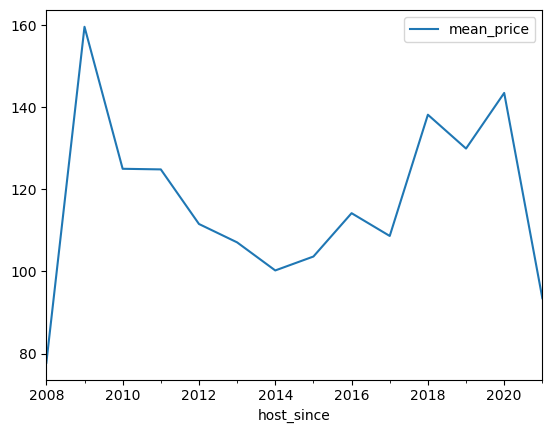

In [16]:
# requires a sort index on host_since

# Create two line charts: one showing the count of new hosts over time, and one showing average price. 
# Set the y-axis limit to 0, add a title, and change axis labels as needed

paris_listings_over_time.plot(y='mean_price')


<Axes: xlabel='host_since'>

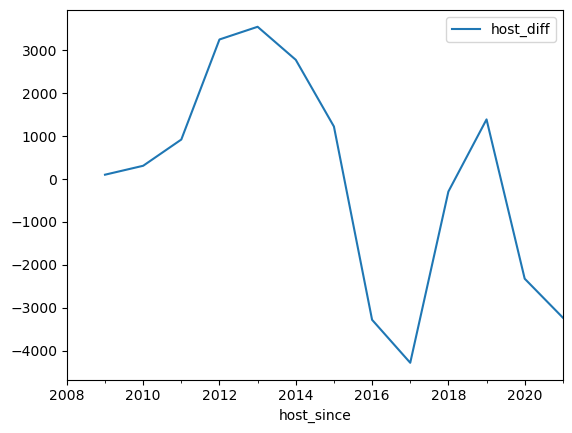

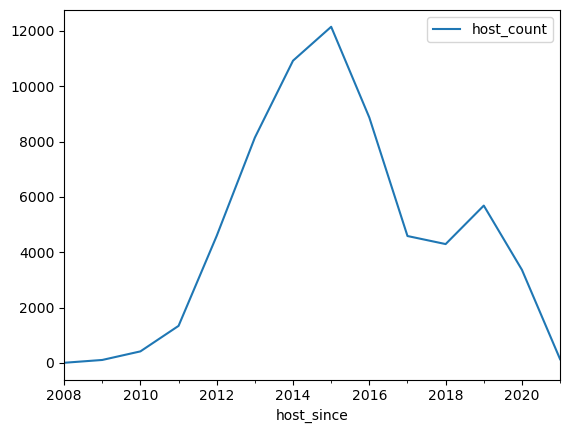

In [17]:
# my solution (host_diff):

paris_listings_over_time.plot(y='host_diff')

# solution by Maven (total number of hosts):

paris_listings_over_time.plot(y='host_count')


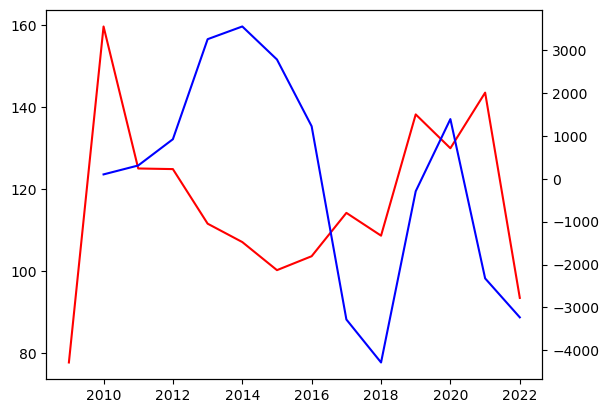

In [18]:
# my solution (with host difference per year):

import matplotlib.pyplot as plt

fig, ax_price = plt.subplots(sharex=True)

ax_price.plot (paris_listings_over_time.index
        ,paris_listings_over_time['mean_price']
        ,label = 'mean price'
        ,color = 'red'
        )
ax_price.set_ylabel = 'mean price'

ax_hosts = ax_price.twinx()
ax_hosts.plot (paris_listings_over_time.index
              ,paris_listings_over_time['host_diff']
              ,label = 'host difference'
              ,color = 'blue'
        )
ax_hosts.set_ylabel = 'host difference'

plt.show()

# No labels in my graph?

# increase of hosts: decrease in price


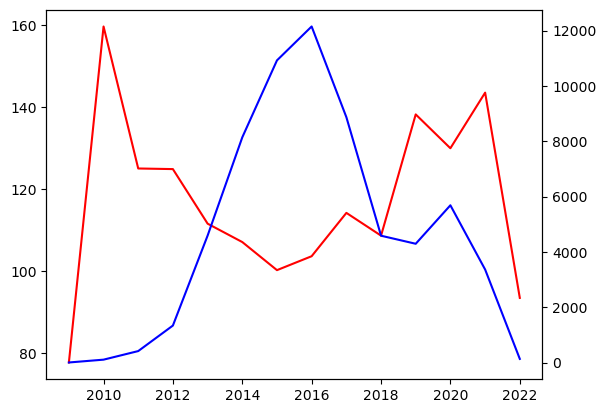

In [19]:

# Maven solution:

import matplotlib.pyplot as plt

fig, ax_price = plt.subplots(sharex=True)

ax_price.plot (paris_listings_over_time.index
        ,paris_listings_over_time['mean_price']
        ,label = 'mean price'
        ,color = 'red'
        )
ax_price.set_ylabel = 'mean price'

ax_hosts = ax_price.twinx()
ax_hosts.plot (paris_listings_over_time.index
              ,paris_listings_over_time['host_count']
              ,label = 'host difference'
              ,color = 'blue'
        )
ax_hosts.set_ylabel = 'host count'

plt.show()

# No labels in my graph?

# increase of hosts: decrease in price


In [ ]:

'''

Todo:
-----

Recommended Analysis
Can you spot any major differences in the Airbnb market between cities?

Which attributes have the biggest influence in price?

Are you able to identify any trends or seasonality in the review data?

Which city offers a better value for travel?

Want feedback on your solutions?
Share visualizations (and any applicable pivot tables, code, etc) on LinkedIn and mention @Maven Analytics. We would love to see your work and give our thoughts!

'''
